### Finding the note being played
Here I used what we learned in Practical 5 to find out what note I have recored, by using the Fast Fourier transform to extract the frequencies from the wave file.

In [4]:
#copied from Eugene, magic that makes better graphs
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

In [5]:
#reading the wavfile 
sampFreq, sound = wavfile.read('original.wav')
#convert our sound (numpy) array to floating point values ranging from -1 to 1 as follows
sound = sound / 2.0**15
#length of the sound in seconds
length_in_s = sound.shape[0] / sampFreq
#choosing one the sound channels to work with
signal = sound[:,0]
#isolating the frequencies of sine waves that make up that sound with a fast fourier transform
fft_spectrum = np.fft.rfft(signal)
#getting the frequency
freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)
#to obtain the Amplitude vs. Frequency spectrum find the absolute value of the fourier transform
fft_spectrum_abs = np.abs(fft_spectrum)
#printing the peak frequencies
for i,f in enumerate(fft_spectrum_abs):
    if f > 1000: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} Hz with amplitude {} '.format(np.round(freq[i],1),  np.round(f,2)))
print('The note is A3')

frequency = 231.3 Hz with amplitude 1481.06 
frequency = 232.3 Hz with amplitude 3001.97 
frequency = 233.2 Hz with amplitude 1417.37 
frequency = 464.5 Hz with amplitude 1370.3 
frequency = 465.5 Hz with amplitude 2567.95 
frequency = 466.5 Hz with amplitude 1077.04 
The note is A3


### Plotting the frequencies and Corresponding Amplitudes
Just for a little visual representation I put a graph of frequencies of the wav file and thier amplitudes

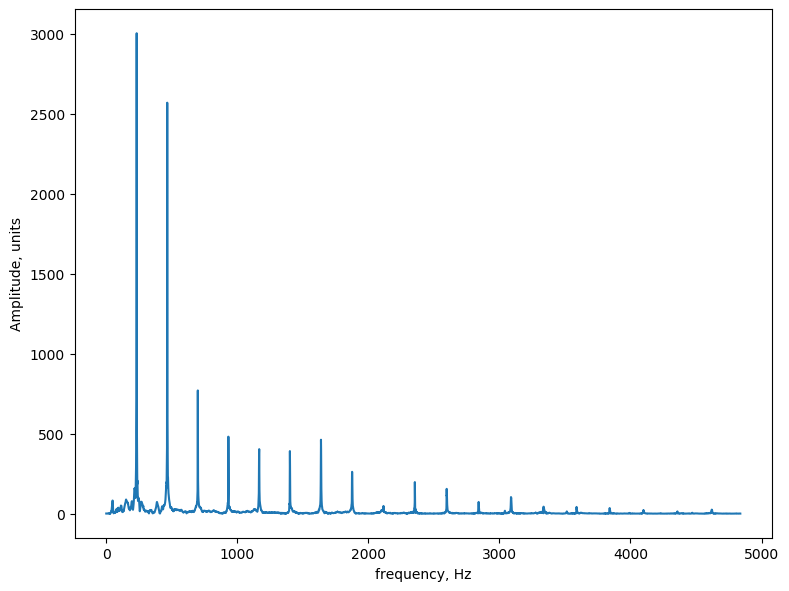

In [6]:
#plotting frequency and amplitude
plt.plot(freq[:5000], np.abs(fft_spectrum)[:5000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

### Tuning the note
The purpose of this project is to Tune a note so that it fits a melody that i want, our note as we found out is an A3 but this is not in tune with the melody I made, so lets tune it to a C5. 

one thing to note:

**wave.open() function reads wav files as int16 (for 16-bit wavs) or int32 (for 32-bit wavs)**

one difficulty with this is making sure that everything stays as an int as wav files need to be int16 or 16 bit files.
Another was making sure that the wav file I am using is compatible with python, I tried using a wav file of a guitar i downloaded but it came as a float32 file.

In [7]:
#importing library
import wave
#opening the file to be editted 
original = wave.open('original.wav', 'r')
# Setting the parameters for the output file.
params = list(original.getparams())

#creating a new wavfile
change = wave.open('changed.wav', 'w')
#setting the parameters for the new wavfile
change.setparams(params)
# writting the framrate i want changing the number adds effect high number sound is clear we want low so we can have
#special effects
frames = 200
# becuase we want to work by fractions of seconds  1/fr second at a time. using floor division to keep frames as int files.
framerate = original.getframerate()//frames  

#getting the count of the whole file
count = int(original.getnframes()/framerate)  
# shifting frequency by 50 Hz using floor division again to work by the largest fraction of frames
shift = 290//frames  
#starting a for loop to write data in the change.wav file
for i in range(count):
    
    data = np.fromstring(original.readframes(framerate), dtype=np.int16)
    # spliting the data in the left and right channel
    left = data[0::2]  # left and right channel
    right = data[1::2]
    #finding the frequencies using a fourier transform for each channel
    lf = np.fft.rfft(left) 
    rf = np.fft.rfft(right)
    #using np.roll to shift the data in the channels to a new frequency
    lf = np.roll(lf, shift) 
    rf = np.roll(rf, shift)
    #using inverse fourier transform to get back original data
    nl = np.fft.irfft(lf)
    nr = np.fft.irfft(rf)
    #adding the channels together
    ns = np.column_stack((nl, nr)).ravel().astype(np.int16)
    #writing the data
    change.writeframes(ns.tostring())
#closing files
original.close()
change.close()

C:\Users\elfid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


### Heres what the sound file looks like now!

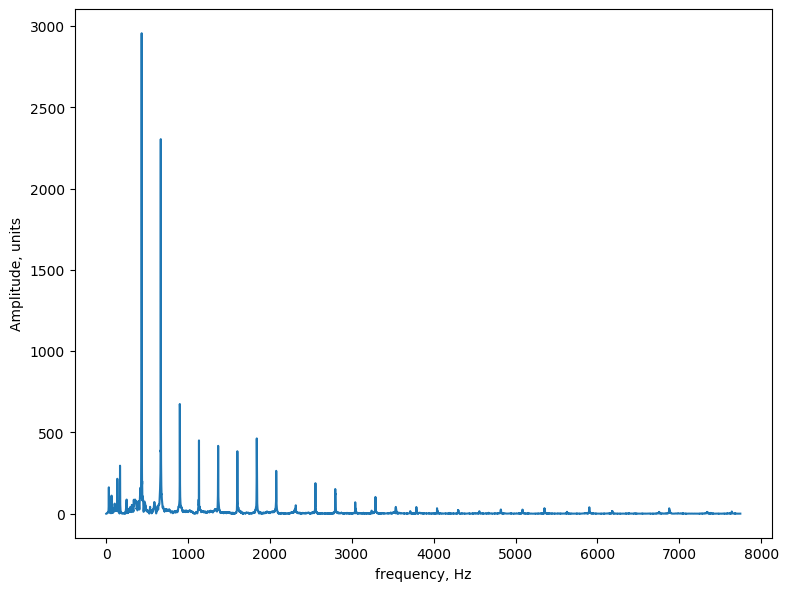

In [8]:
#reading the wavfile 
sampFreq, sound = wavfile.read('changed.wav')
#convert our sound (numpy) array to floating point values ranging from -1 to 1 as follows
sound = sound / 2.0**15
#length of the sound in seconds
length_in_s = sound.shape[0] / sampFreq
#choosing one the sound channels to work with
signal = sound[:,0]
#isolating the frequencies of sine waves that make up that sound with a fast fourier transform
fft_spectrum = np.fft.rfft(signal)
#getting the frequency
freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)
#to obtain the Amplitude vs. Frequency spectrum find the absolute value of the fourier transform
fft_spectrum_abs = np.abs(fft_spectrum)
#printing the peak frequencies

#plotting frequency and amplitude
plt.plot(freq[:8000], np.abs(fft_spectrum)[:8000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

### Creating my own sound
Things didnt go as planned, so instead of dealing with files i got from somewhere else, why not make my own!

In [9]:
#importing libraries
import numpy as np
from scipy.io.wavfile import write

#samples per second
samps = 44100

#frequency of the sine wave
freq_1 = 200
freq_2 = 250
freq_3 = 300
#duration
duration = 3.0

# creating an array that will denote the time of the chord
time = np.arange(duration * samps)
#creating different waveforms with sine functions
waveform1 = np.sin(2 * np.pi * time * freq_1 / samps)
waveform2 = np.sin(2 * np.pi * time * freq_2 / samps)
waveform3 = np.sin(2 * np.pi * time * freq_3 / samps)
#adding up the sine waves to get a chord 
full_waveform = waveform1 + waveform2 + waveform3 
#reducing the amplitude of the waveform so that it isnt too loud
waveform_low_amp = full_waveform * 0.3
#converting the waveform into 16-bit wav
waveform_int = np.int16(waveform_low_amp * 32767)

# Writing the .wav file
write('chord.wav', samps, waveform_int)

### What I Learned

- How to alter a sound
- how to identify the frequency and amplitude of sounds
- how to create my own sound
- python can be used to create and alter sound that can be made into enjoyable melodies though this can be hit or miss